# Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Standardize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from sklearn.metrics import precision_score, recall_score, plot_roc_curve, accuracy_score, roc_auc_score, roc_curve

#SVM
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# lightgbm
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

#GridSearch
from sklearn.model_selection import GridSearchCV

# Reading DataSet

In [40]:
df = pd.read_csv('./game_stats_clean.csv')

# Modeling

## Defining X and Y

In [109]:
X = df.select_dtypes(exclude='object')
X = X.loc[:, 'goals_home_1half':]
y = df[['final_result']]

## Standardize

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

## Splitting Train and Test samples

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify=y)

## Model with LightGBM to Baseline Score

In [74]:
lgb = LGBMClassifier(max_depth=1, n_estimators=100, colsample_bytree=.7, n_jobs=-1)

In [75]:
lgb.fit(X_train, y_train)
ypred = lgb.predict(X_test)

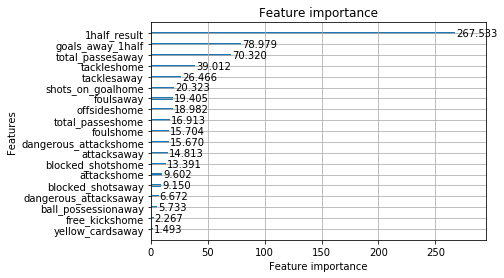

In [76]:
plot_importance(lgb, importance_type='gain')

In [77]:
y_train

95    -1
141    1
104    1
23     0
36     0
      ..
97    -1
26     0
129    1
14     1
2     -1
Name: final_result, Length: 144, dtype: int64

In [78]:
ypred

array([ 1,  0, -1,  1, -1,  0,  1, -1,  1,  0, -1,  1,  1, -1, -1,  1, -1,
       -1,  1, -1,  1,  1,  0,  0,  1,  1, -1,  1,  1,  1,  0, -1,  1,  1,
       -1,  1,  1], dtype=int64)

In [79]:
score=lgb.score(X,y)
score

0.7513812154696132

# GridSearch

In [31]:
param_grid = {
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001],
    'n_estimators': [10, 100, 1000],
    'num_leaves': [31, 127],
    'min_data_in_leaf': [10, 30, 50, 100, 300, 400],
    'max_depth': [1, 5, 10]
                }

In [32]:
gsearch = GridSearchCV(estimator=lgb, param_grid=param_grid)

In [33]:
lgb_model = gsearch.fit(X_train, y_train)

In [34]:
print(lgb_model.best_params_, lgb_model.best_score_)

{'learning_rate': 0.001, 'max_depth': 5, 'min_data_in_leaf': 30, 'n_estimators': 1000, 'num_leaves': 31} 0.6248768472906404


# Testing without 1half_result

In [60]:
X.head()

,goals_home_1half,goals_away_1half,1half_result,ball_possessionhome,ball_possessionaway,goal_attemptshome,goal_attemptsaway,shots_on_goalhome,shots_on_goalaway,shots_off_goalhome,...,tackleshome,tacklesaway,attackshome,attacksaway,dangerous_attackshome,dangerous_attacksaway,red_cardshome,red_cardsaway,completed_passeshome,completed_passesaway
0,0,0,0,37,63,0,12,0,1,0,...,3.0,5.0,40,67,8,24,0.0,0.0,0.0,0.0
1,0,0,0,77,23,2,3,0,1,1,...,10.0,7.0,84,38,39,12,0.0,0.0,0.0,0.0
2,0,1,-1,46,54,5,4,2,2,2,...,11.0,6.0,55,77,26,15,0.0,0.0,0.0,0.0
3,1,0,1,56,44,4,5,2,2,0,...,6.0,3.0,24,14,11,23,0.0,0.0,0.0,0.0
4,1,2,-1,53,47,10,3,3,2,2,...,9.0,7.0,50,44,32,16,0.0,0.0,0.0,0.0


In [89]:
X_without = X.drop(['1half_result', 'goals_home_1half', 'goals_away_1half'], axis = 1)

In [101]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_without)
X_std = pd.DataFrame(X_std, columns=X_without.columns)

In [111]:
scaler = StandardScaler()
y_std = scaler.fit_transform(y)
y_std = pd.DataFrame(y_std, columns=y.columns)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify=y)

In [118]:
lgb_t = LGBMClassifier(learning_rate=0.001, max_depth=5, min_data_in_leaf=30, n_estimators=1000, num_leavves=31)

In [119]:
lgb_t.fit(X_train, y_train)
ypred = lgb_t.predict(X_test)

ValueError: Unknown label type: 'continuous'

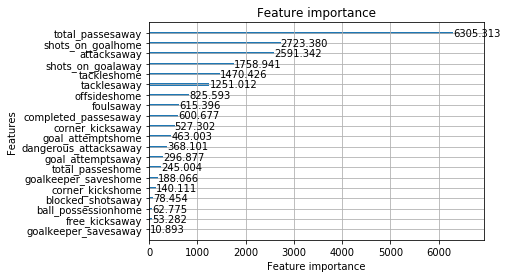

In [115]:
plot_importance(lgb_t, importance_type='gain')

In [116]:
ypred

array([-1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1,  1,  1], dtype=int64)

In [107]:
score=lgb_t.score(X_without,y)
score

0.35359116022099446